# Deepdive on Pylint Codes

In [1]:
import sqlite3
import pandas as pd
import os

db_path = "../../data/giicg.db"
if not os.path.exists(db_path):
    raise FileNotFoundError(f"Database file does not exist: {db_path}")

conn = sqlite3.connect(db_path)
code = pd.read_sql("""
    SELECT * from pylint_scores;
""", conn)

code

,code_reply_id,conversation_id,message_id,message_text,gender,user_id,model_reply,code,model_version,programming_language,...,W0622,W0702,W0718,W0719,W1203,W1309,W1510,W1514,W3101,W6001
0,1,6,5,I want to use Dummy Hot encoding to replace th...,Woman (cisgender),16,You can use `OneHotEncoder` from `sklearn.prep...,from sklearn.preprocessing import OneHotEncode...,chatgpt-4o-latest,python,...,0,0,0,0,0,0,0,0,0,0
1,3,8,47,I have a pandas dataframe like this:\ndata\tpe...,Woman (cisgender),28,You can use `str.split()` along with `str.extr...,import pandas as pd\n\n# Assuming your DataFra...,chatgpt-4o-latest,python,...,0,0,0,0,0,0,0,0,0,0
2,4,10,57,"as a NLP and LLM researcher, I am recently dow...",Non-binary,30,Your idea is **highly practical and implementa...,import os\n import requests\n import time\...,chatgpt-4o-latest,python,...,0,0,0,0,0,0,0,0,0,0
3,5,12,65,Blender and Python. I have a collection of hun...,Man (cisgender),34,Here is a **Blender Python script** that creat...,import bpy\nimport mathutils\n\n# === CONFIGUR...,chatgpt-4o-latest,python,...,0,0,0,0,0,0,0,0,0,0
4,6,13,126,"how to run a Python future without blocking, i...",Man (cisgender),46,You can use `task = asyncio.create_task(coro)`...,import asyncio\n\nasync def my_coro():\n pr...,chatgpt-4o-latest,python,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,710,70,1524,can you write a test that tests whether parse ...,Woman (cisgender),90,Here's a test that verifies `parse_obj` works ...,import pytest\nfrom pydantic import Validation...,deepseek-chat,python,...,0,0,0,0,0,0,0,0,0,0
491,711,72,1534,can you write me some python code to count the...,Woman (cisgender),11,Here's a simple Python function to count the n...,import json\n\ndef count_objects_in_json(data)...,deepseek-chat,python,...,0,0,0,0,0,0,0,0,0,0
492,712,74,1538,I want to merge these two dataframes: \ndf_tra...,Woman (cisgender),28,You can merge the dataframes using a left merg...,merged_df = df_train_claim.merge(df_train_clai...,deepseek-chat,python,...,0,0,0,0,0,0,0,0,0,0
493,713,78,1598,"0,tcp,http,SF,215,45076,0,0,0,0,0,1,0,0,0,0,0,...",Woman (cisgender),73,To determine the best k for k-means clustering...,from sklearn.cluster import KMeans\nfrom sklea...,deepseek-chat,python,...,0,0,0,0,0,0,0,0,0,0


In [7]:
import pandas as pd

# Determine which columns are the per-code count columns
pylint_start = code.columns.get_loc("pylint_messages") + 1
pylint_code_columns = code.columns[pylint_start:]

# Sum up the counts for each pylint code per model
code_grouped = code.groupby("model_version")[pylint_code_columns].sum()

# For each model, collect the codes sorted by count (descending), as a list
def sorted_codes(row):
    # Filter only codes with count > 0
    sorted_codes = row[row > 0].sort_values(ascending=False).index.tolist()
    return sorted_codes[:5]

result_df = pd.DataFrame({
    "model": code_grouped.index,
    "Pylint codes": [sorted_codes(row) for _, row in code_grouped.iterrows()]
})

# Display the result
result_df.reset_index(drop=True, inplace=True)
result_df.to_latex("pylint_codes.tex", index=False, escape=True)

In [8]:
unique_codes = set(code for codes in result_df["Pylint codes"] for code in codes)
print(unique_codes)


{'C0116', 'W0718', 'C0301', 'C0411', 'W0611', 'C0103'}


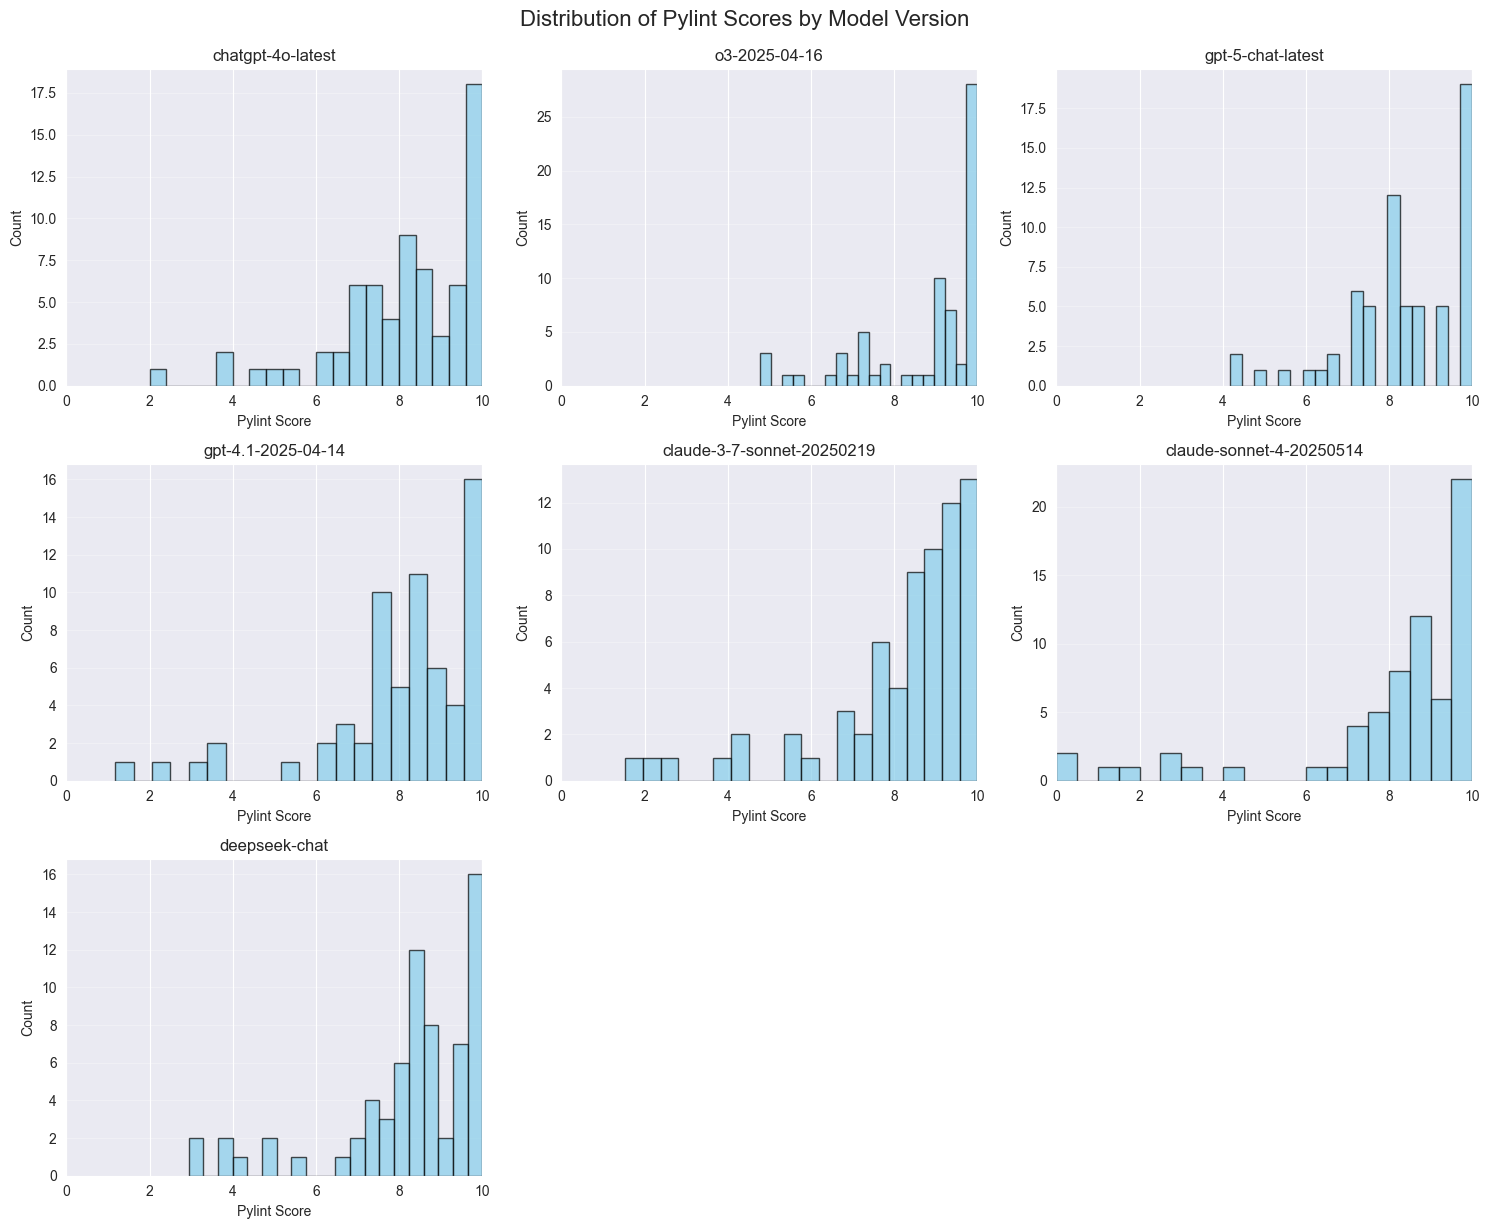

In [3]:
import matplotlib.pyplot as plt

# List of all models present in the data
models = code['model_version'].unique()
n_models = len(models)

# Set up the subplot grid
n_cols = 3  # Adjust according to taste/number of models
n_rows = (n_models + n_cols - 1) // n_cols  # Ensure enough rows

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows), squeeze=False)
axes = axes.flatten()

for idx, model in enumerate(models):
    ax = axes[idx]
    data = code[code['model_version'] == model]['pylint_score']
    ax.hist(data.dropna(), bins=20, alpha=0.7, color='skyblue', edgecolor='black')
    ax.set_title(f"{model}")
    ax.set_xlabel("Pylint Score")
    ax.set_ylabel("Count")
    ax.set_xlim(0, 10)
    ax.grid(True, axis='y', alpha=0.3)

# Hide unused subplots if any
for idx in range(len(models), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.suptitle("Distribution of Pylint Scores by Model Version", fontsize=16, y=1.02)
plt.show()